In [1]:
# Loading all necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Loading the dataset of user 6
User6 = pd.read_csv('User6_BEHACOM.csv', encoding='latin1')

In [3]:
# Dropping the unnecessary columns
B = User6.drop(columns=['current_app', 'penultimate_app','USER', 'timestamp'])

In [4]:
# Defining training set
B_train = B

# Random scalar
x = 50 

# Defining the testing data        
B_test = B * x

In [5]:
# Scaling the sets
scaler = MinMaxScaler()

# The training data is fitted and transformed
B_train_scaled = scaler.fit_transform(B_train)

# The testing data is transformed
B_test_scaled = scaler.transform(B_test)

print(B_test_scaled)
print(B_train_scaled)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.83091007e+00
  4.28035105e+01 1.00115448e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.62089391e+01
  1.51332206e+01 4.48437129e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.45395800e+00
  1.01767142e+01 3.99078416e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.61550889e-01
  6.40250858e-03 2.47347311e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.30802369e-01
  7.46789231e-01 3.91706126e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.88476037e-01
  1.22798394e+01 2.10455326e+00]]
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.66182014e-02
  8.56070211e-01 2.00230895e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.24178783e-01
  3.02664412e-01 8.96874259e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.90791599e-02
  2.03534284e-01 7.98156832e-02]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.23101777e-03
  1.28050172e-04 4.94694621e-03]

In [6]:
# Constructing the One Class SVM model
model = OneClassSVM(kernel='rbf', gamma='scale', nu=0.1)

In [7]:
# Fitting the model with the training data
model.fit(B_train_scaled)

OneClassSVM(nu=0.1)

In [8]:
# Deriving the decision function values
decisionf = model.decision_function(B_train_scaled)

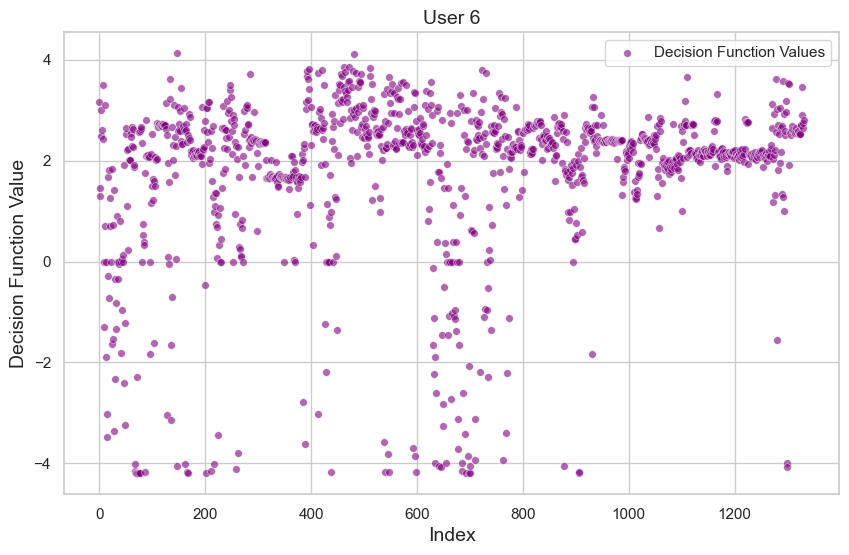

In [9]:
sns.set(style='whitegrid', palette='muted')                     

plt.figure(figsize=(10, 6))

# Plotting the decision function output data
sns.scatterplot(x=range(len(decisionf)),
                y=decisionf, 
                color='purple', 
                marker='o', 
                s=30, 
                label='Decision Function Values', 
                alpha=0.6)

# Customising the plots
plt.title('User 6', fontsize=14)
plt.xlabel('Index', fontsize=14)
plt.ylabel('Decision Function Value', fontsize=14)

plt.grid(True)
plt.legend()

plt.show()